In [ ]:
import numpy as np 
import pandas as pd
import os

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import probplot
from pandas.plotting import scatter_matrix
from scipy import stats

In [5]:
car_prices_df = pd.read_csv('D:/vehical/car_prices.csv')
car_prices_df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [9]:
car_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [11]:
df = car_prices_df.copy()
df.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

In [13]:
# Fill missing values with 'Other' category ( More Unique value )
df['make'] = df['make'].fillna('Other')
df['model'] = df['model'].fillna('Other')
df['trim'] = df['trim'].fillna('Other')
df['color'] = df['color'].fillna('Other')

# Fill missing values with mode
df['body'] = df['body'].fillna(df['body'].mode()[0])
df['transmission'] = df['transmission'].fillna(df['transmission'].mode()[0])
df['interior'] = df['interior'].fillna(df['interior'].mode()[0])

# Remove null values
df.dropna(subset=['vin'], inplace=True)
df.dropna(subset=['saledate'], inplace=True)


In [14]:
df.isnull().sum()

year                0
make                0
model               0
trim                0
body                0
transmission        0
vin                 0
state               0
condition       11816
odometer           94
color               0
interior            0
seller              0
mmr                22
sellingprice        0
saledate            0
dtype: int64

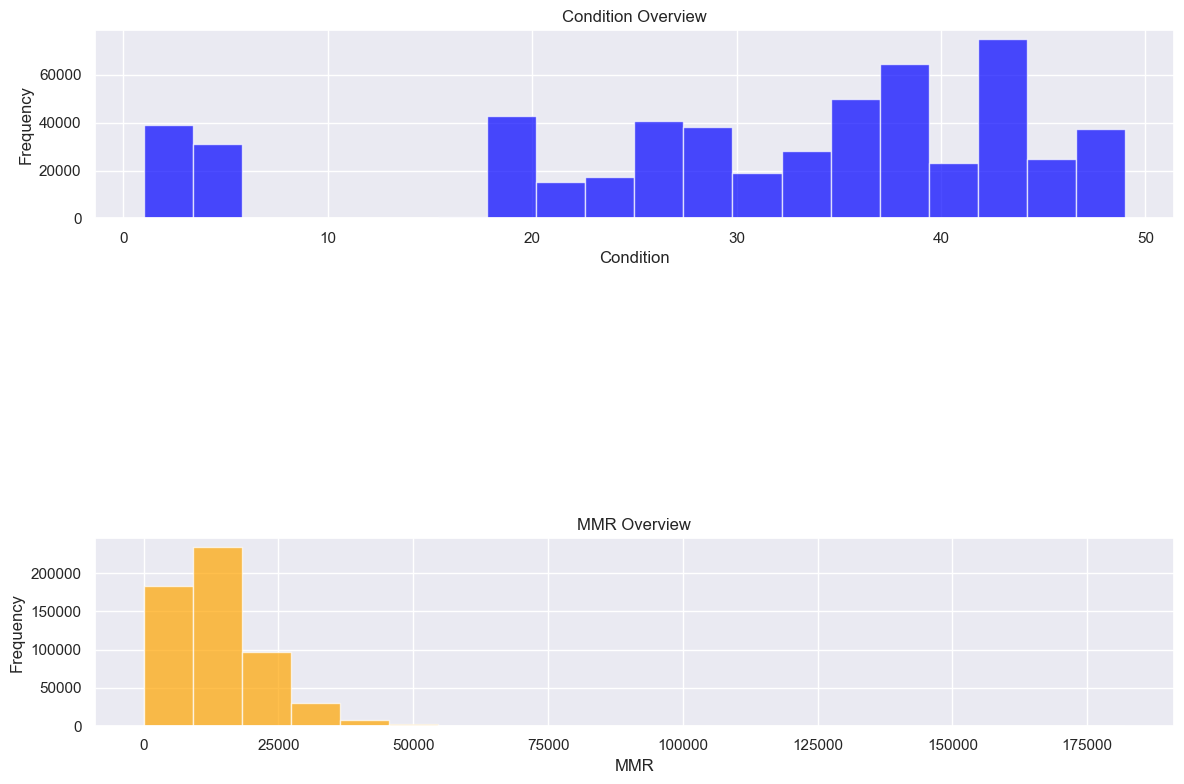

In [305]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset (Update the path if needed)
file_path = 'D:/vehical/car_prices.csv'
df = pd.read_csv(file_path)

# Normalize column names (remove spaces and convert to lowercase)
df.columns = df.columns.str.strip().str.lower()

# Check if required columns exist
if 'condition' in df.columns and 'mmr' in df.columns:
    plt.figure(figsize=(12, 8))

    # Plot histogram for 'condition'
    plt.subplot(3, 1, 1)
    plt.hist(df['condition'].dropna(), bins=20, color='blue', alpha=0.7)
    plt.title('Condition Overview')
    plt.xlabel('Condition')
    plt.ylabel('Frequency')

    # Plot histogram for 'mmr'
    plt.subplot(3, 1, 3)
    plt.hist(df['mmr'].dropna(), bins=20, color='orange', alpha=0.7)
    plt.title('MMR Overview')
    plt.xlabel('MMR')
    plt.ylabel('Frequency')

    plt.subplots_adjust(hspace=0.05)

    plt.tight_layout()
    plt.show()
else:     
    print("Error: One or both required columns ('condition', 'mmr') are not found in the dataset.")                


In [19]:
df['condition'].fillna(df['condition'].median(), inplace=True)
df['odometer'].fillna(df['odometer'].mean(), inplace=True)
df['mmr'].fillna(df['mmr'].mean(), inplace=True)

In [21]:
df.isnull().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

In [23]:
duplicate_rows = df[df.duplicated()]
duplicate_rows.sum()

year              0
make              0
model             0
trim              0
body              0
transmission      0
vin               0
state             0
condition       0.0
odometer        0.0
color             0
interior          0
seller            0
mmr             0.0
sellingprice    0.0
saledate          0
dtype: object

In [25]:
df.describe()

,year,condition,odometer,mmr,sellingprice
count,558821.000000,558821.000000,558821.000000,558821.000000,558821.000000
mean,2010.038828,30.764059,68321.141250,13769.377495,13611.358176
std,3.966874,13.275023,53394.310676,9679.776628,9749.536466
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,24.000000,28375.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52268.000000,12250.000000,12100.000000
75%,2013.000000,41.000000,99104.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


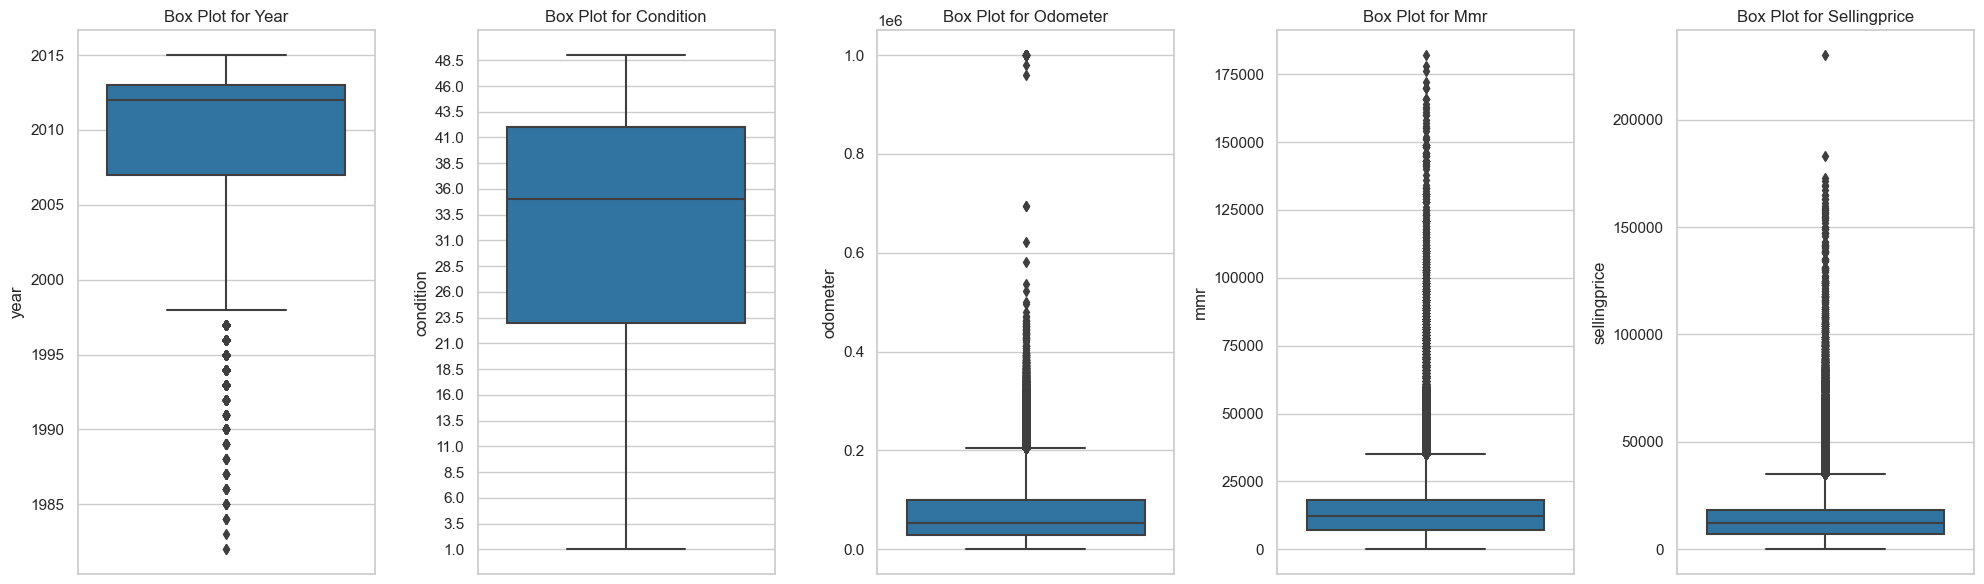

In [347]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


file_path = 'D:/vehical/car_prices.csv'
df = pd.read_csv(file_path)


columns_to_plot = ['year', 'condition', 'odometer', 'mmr', 'sellingprice']

# Visualization
plt.figure(figsize=(20, 6))

for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(1, 5, i)
    sns.boxplot(y=col, data=df)
    plt.title(f'Box Plot for {col.capitalize()}')

    if col == 'condition':
        plt.yticks(np.arange(min(df['condition']), max(df['condition']) + 1, 2.5))

plt.tight_layout()
plt.show()

In [225]:
import pandas as pd

# Sample DataFrame (Replace with actual DataFrame)
df = pd.DataFrame({'condition': [5, 45, 41, 43, 42, 19, 29, 47, 37, 36, 25, 33, None, 3, 4, 2, 1]})

# Remove Missing Values
df = df.dropna(subset=['condition'])

# Check Maximum Value
max_condition = df['condition'].max()

# Normalize Condition Values (if necessary)
if max_condition > 5:
    df['condition'] = df['condition'] / 10  

# Keep Only Valid Condition Values (1 to 5)
df = df[(df['condition'] >= 1) & (df['condition'] <= 5)]

# Convert to Integer
df['condition'] = df['condition'].astype(int)

# Display Unique Values
print(df['condition'].unique())

# Display Clean DataFrame
print(df.head())

[4 1 2 3]
   condition
1          4
2          4
3          4
4          4
5          1


In [231]:
print("Original Data:")
print(df_original['condition'].unique())  # Original values
print("\nCleaned Data:")
print(df['condition'].unique())  # Cleaned values

Original Data:
[ 5. 45. 41. 43. 42. 19. 29. 47. 37. 36. 25. 33. nan  3.  4.  2.  1.]

Cleaned Data:
[4 2 3 5]
   condition
1          4
2          4
3          4
4          4
5          2


In [35]:
clean_df.head(2)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)


In [37]:
clean_df.describe()

,year,condition,odometer,mmr,sellingprice
count,511816.000000,511816.000000,511816.000000,511816.000000,511816.000000
mean,2010.237798,31.030118,63351.716578,13029.954811,12861.592033
std,3.704200,13.043716,43007.915008,7230.515564,7331.708638
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2008.000000,25.000000,28792.000000,7675.000000,7400.000000
50%,2012.000000,35.000000,51633.000000,12300.000000,12100.000000
75%,2013.000000,41.000000,94396.500000,17650.000000,17600.000000
max,2015.000000,49.000000,175107.000000,33100.000000,33100.000000


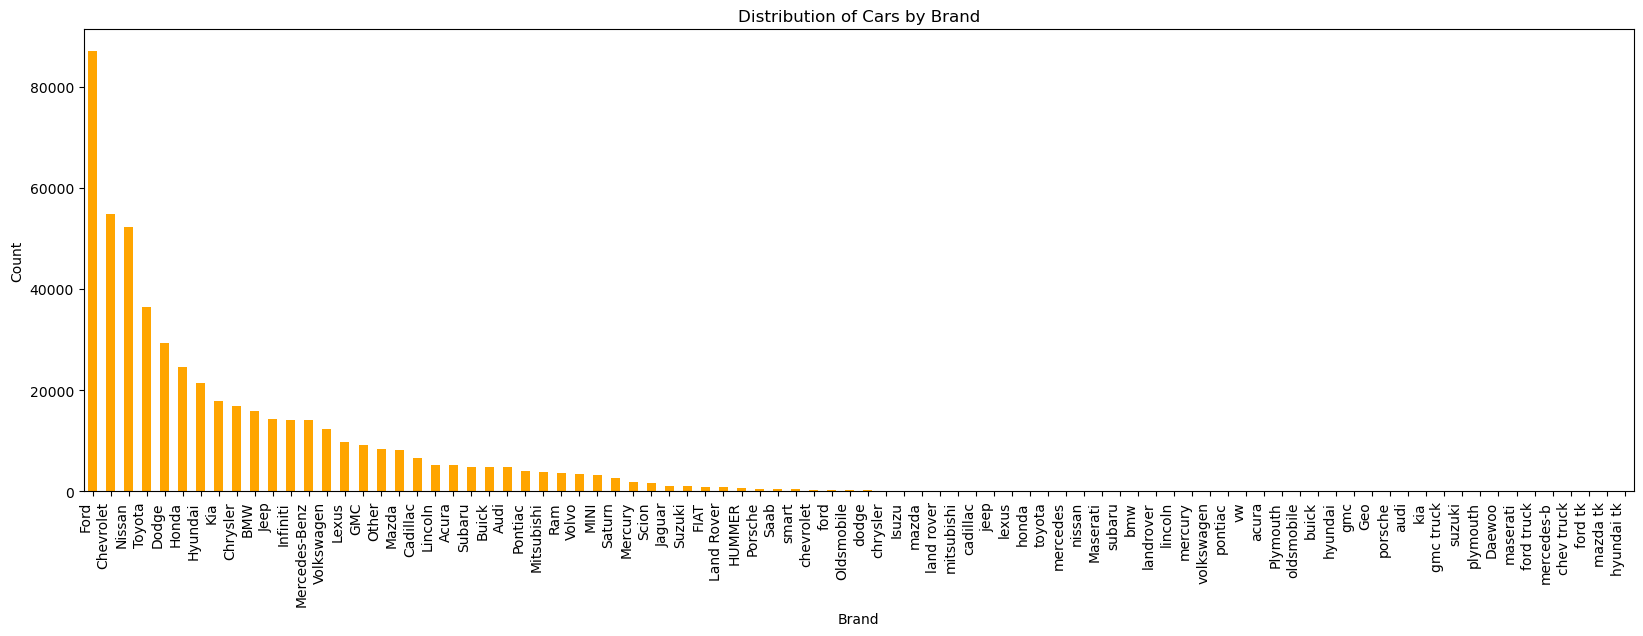

In [47]:
plt.figure(figsize=(20, 6))

clean_df['make'].value_counts().plot(kind='bar', color='orange')
plt.title('Distribution of Cars by Brand')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.show()

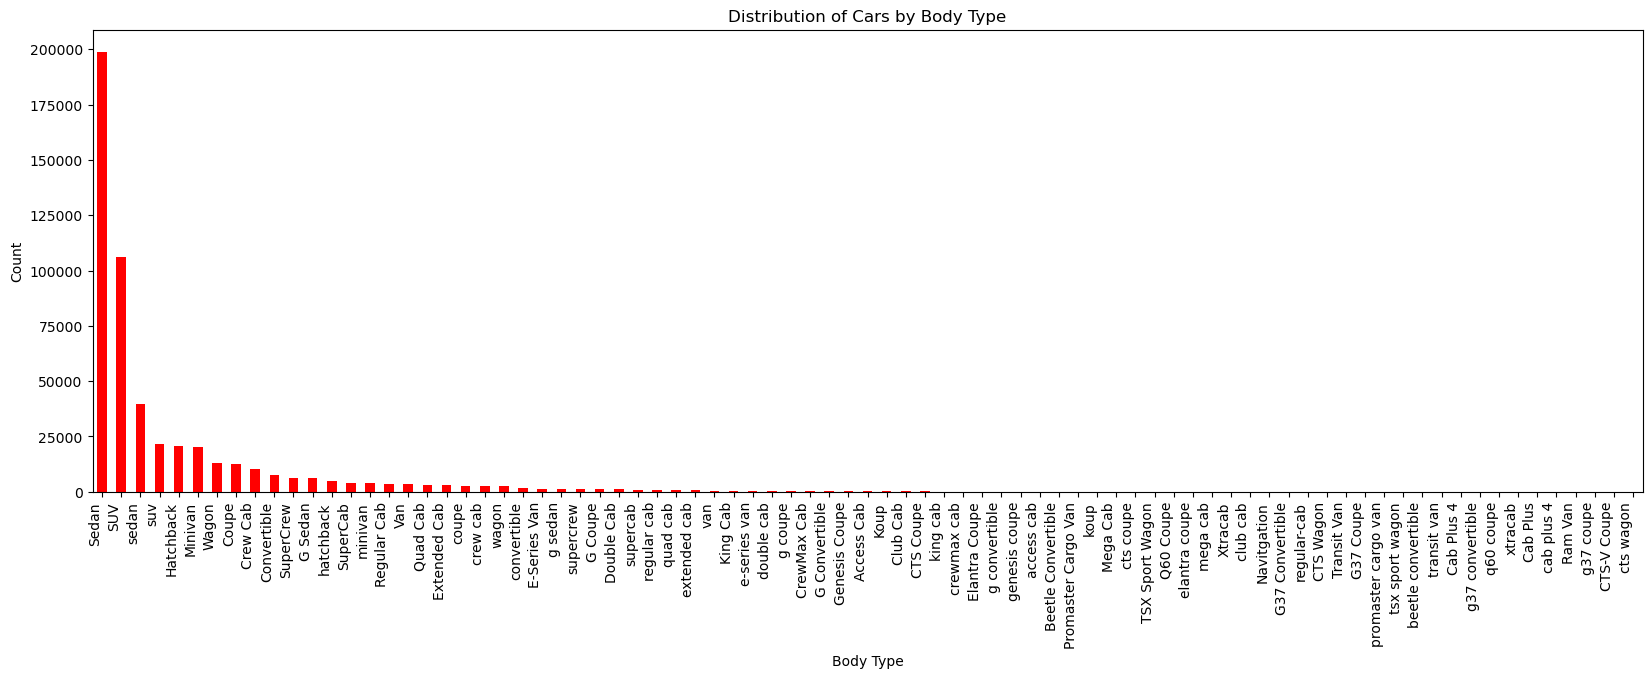

In [49]:
plt.figure(figsize=(20, 6))
clean_df['body'].value_counts().plot(kind='bar', color='red')
plt.title('Distribution of Cars by Body Type')
plt.xlabel('Body Type')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.show()

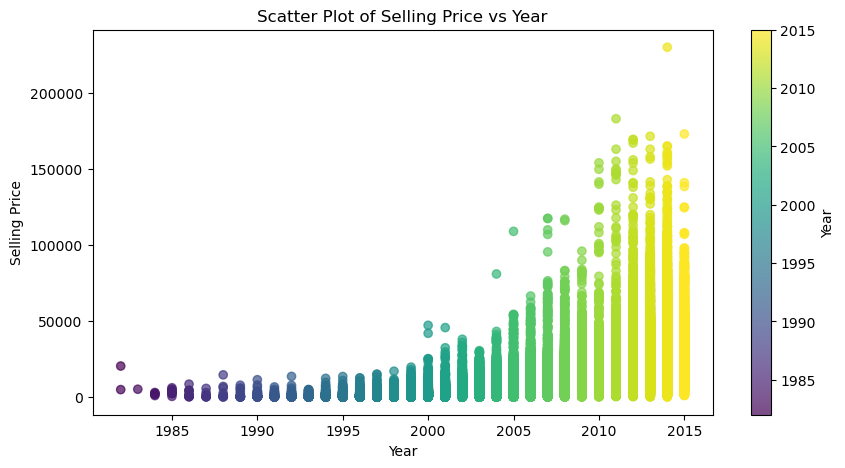

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
df = pd.read_csv("D:/vehical/car_prices.csv")

# Create the scatter plot
plt.figure(figsize=(10, 5))
plt.scatter(df["year"], df["sellingprice"], c=df["year"], cmap="viridis", alpha=0.7)

# Add labels and title
plt.xlabel("Year")
plt.ylabel("Selling Price")
plt.title("Scatter Plot of Selling Price vs Year")

plt.colorbar(label="Year")  # Add a color bar for better visualization
plt.show()


In [15]:
#Correlation matrix
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

numerical_columns.corr()

,year,condition,odometer,mmr,sellingprice
year,1.000000,0.340320,-0.772737,0.596631,0.586480
condition,0.340320,1.000000,-0.318188,0.281415,0.321944
odometer,-0.772737,-0.318188,1.000000,-0.588113,-0.582393
mmr,0.596631,0.281415,-0.588113,1.000000,0.983635
sellingprice,0.586480,0.321944,-0.582393,0.983635,1.000000


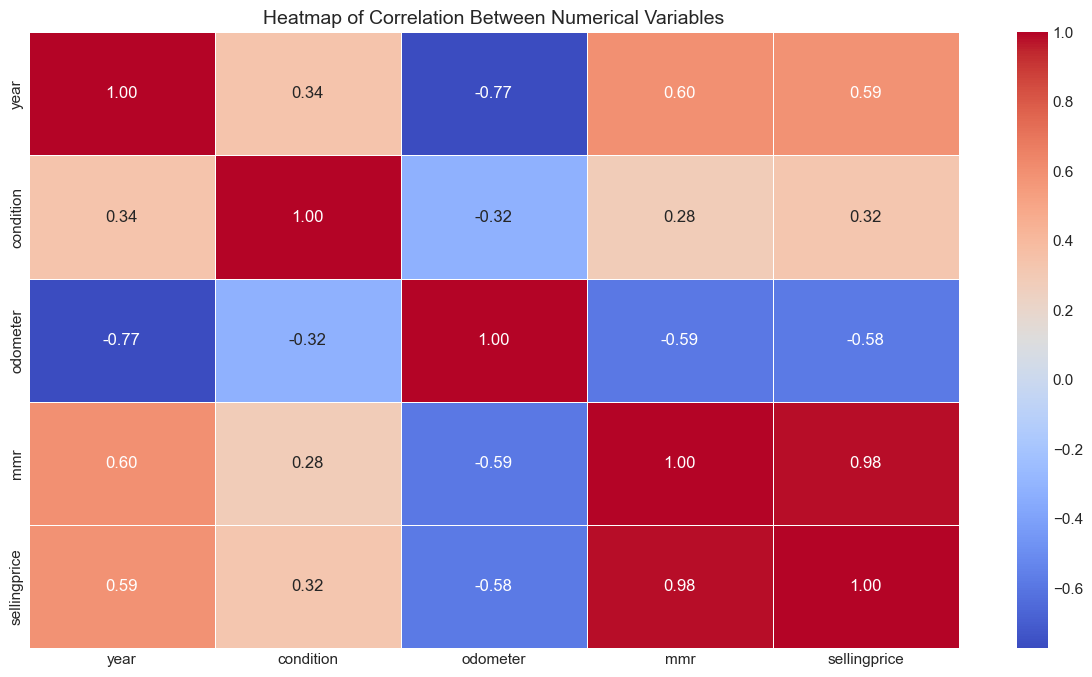

In [217]:
import seaborn as sns
colmns = df.select_dtypes(include=['number'])
corr = colmns.corr()
plt.figure(figsize=(15, 8))  
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap of Correlation Between Numerical Variables", fontsize=14)
plt.show()

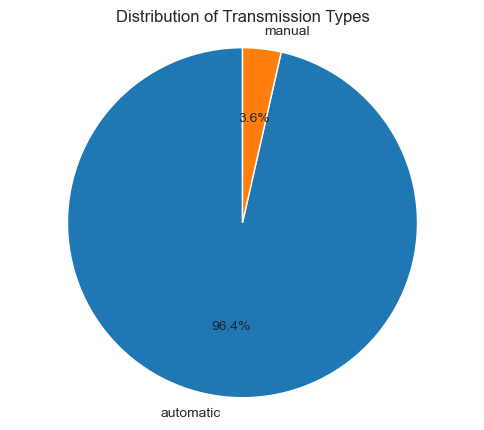

In [153]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data (replace with your actual dataset)
file_path = 'D:/vehical/car_prices.csv'  # Update with your correct path
data = pd.read_csv(file_path)

# Filter only 'automatic' and 'manual' transmissions
filtered_data = data[data['transmission'].isin(['automatic', 'manual'])]

# Count values for transmission
car_transmission = filtered_data['transmission'].value_counts()

# Define colors for automatic & manual
colors = ['#1f77b4', '#ff7f0e']  # Blue & Orange

# Set figure size
plt.figure(figsize=(6, 5))

# Create pie chart
plt.pie(
    car_transmission, labels=car_transmission.index, 
    autopct='%1.1f%%', startangle=90, colors=colors, 
    wedgeprops={'edgecolor': 'white'}, textprops={'fontsize': 10}  # Fix text overlap
)

# Add title
plt.title('Distribution of Transmission Types', fontsize=12)

# Ensure pie is circular
plt.axis('equal')

# Show plot
plt.show()


In [179]:
condition_mapping = {
    (0, 10): "Poor",
    (11, 20): "Needs Major Maintenance",
    (21, 30): "Fair",
    (31, 50): "Good"
}

In [185]:
df = df.dropna(subset=['condition']).reset_index(drop=True)
df['condition_category'] = df['condition'].apply(map_condition)

print(df[['condition', 'condition_category']].head(20))


    condition       condition_category
0         5.0                     Poor
1         5.0                     Poor
2        45.0                     Good
3        41.0                     Good
4        43.0                     Good
5         1.0                     Poor
6        34.0                     Good
7         2.0                     Poor
8        42.0                     Good
9         3.0                     Poor
10       48.0                     Good
11       48.0                     Good
12        2.0                     Poor
13        5.0                     Poor
14        2.0                     Poor
15       49.0                     Good
16       17.0  Needs Major Maintenance
17       34.0                     Good
18       19.0  Needs Major Maintenance
19       29.0                     Fair


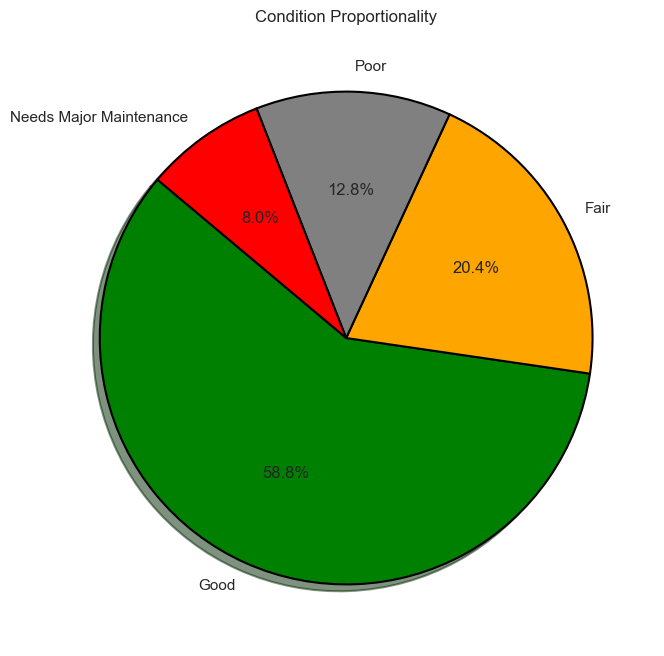

In [187]:
import matplotlib.pyplot as plt

# Count condition categories
condition_counts = df['condition_category'].value_counts()

# Define colors
colors = {'Good': 'green', 'Fair': 'orange', 'Needs Major Maintenance': 'red', 'Poor': 'gray'}

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(condition_counts, labels=condition_counts.index, autopct='%1.1f%%', startangle=140,
        colors=[colors[label] for label in condition_counts.index], wedgeprops={'edgecolor': 'black', 'linewidth': 1.5}, shadow=True)

# Title
plt.title("Condition Proportionality")

# Show chart
plt.show()


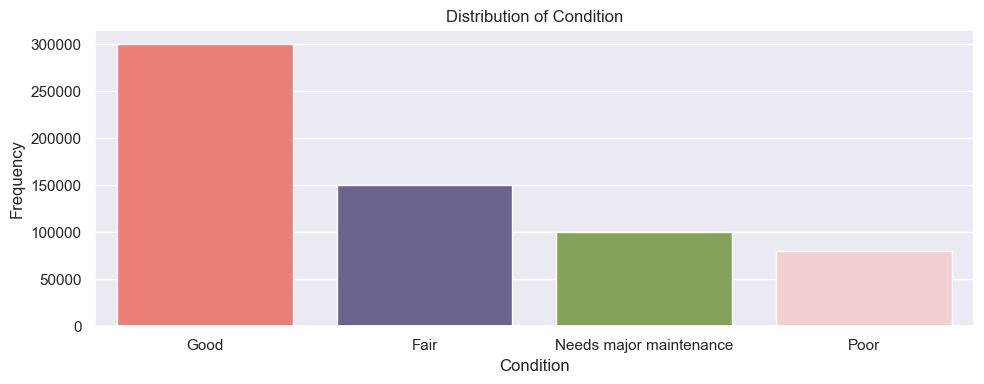

In [207]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
sns.set_theme(style='darkgrid')

# Custom colors for each bar
colors = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9']  # Red, Purple, Green, Pink

sns.barplot(
    x=df['condition_category'].value_counts().index,  
    y=df['condition_category'].value_counts().values,  
    palette=colors
)

plt.title('Distribution of Condition')
plt.xlabel('Condition')
plt.ylabel('Frequency')

plt.xticks(rotation=0)  # Keep labels straight
plt.tight_layout()
plt.show()


In [119]:
print(car_prices_df.info())  # Get column info and data types
print(car_prices_df.head())  # Preview first 5 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB
None
   year   make              

Data loaded successfully!
Min Year: 1982, Max Year: 2015


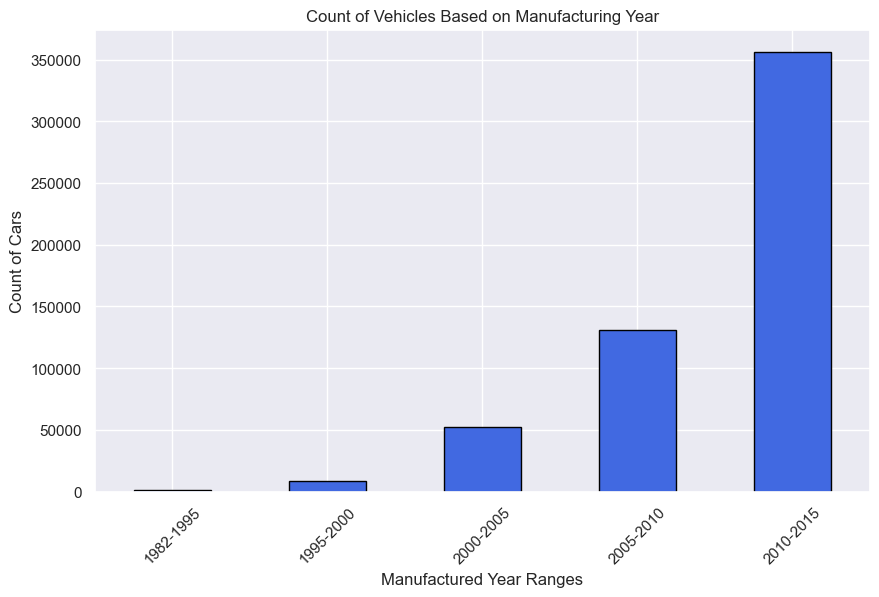

In [209]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore future warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Load dataset
file_path = 'D:/vehical/car_prices.csv'  # Adjust the path if needed
try:
    data = pd.read_csv(file_path)
    print("Data loaded successfully!")
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
    exit()

# Ensure 'year' column exists
if 'year' in data.columns:
    # Get min and max years
    min_year = data['year'].min()
    max_year = data['year'].max()
    print(f"Min Year: {min_year}, Max Year: {max_year}")

    # Set plot style
    sns.set_style('darkgrid')

    # Define bins for grouping
    bins = [min_year, 1995, 2000, 2005, 2010, max_year]
    labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins) - 1)]
    data['year_group'] = pd.cut(data['year'], bins=bins, labels=labels, right=False)

    # Count the number of cars in each interval
    car_years = data['year_group'].value_counts().sort_index()

    # Plot the bar chart
    plt.figure(figsize=(10, 6))
    car_years.plot(kind='bar', color='royalblue', edgecolor='black')

    # Add labels and title
    plt.xlabel('Manufactured Year Ranges')
    plt.ylabel('Count of Cars')
    plt.title('Count of Vehicles Based on Manufacturing Year')

    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

    # Show plot
    plt.show()

else:
    print("Error: Column 'year' not found in dataset!")


In [129]:
pip install adjustText


  Obtaining dependency information for adjustText from https://files.pythonhosted.org/packages/53/1c/8feedd607cc14c5df9aef74fe3af9a99bf660743b842a9b5b1865326b4aa/adjustText-1.3.0-py3-none-any.whl.metadata


C:\Users\hasmu\AppData\Local\Temp\ipykernel_11204\2291355266.py:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


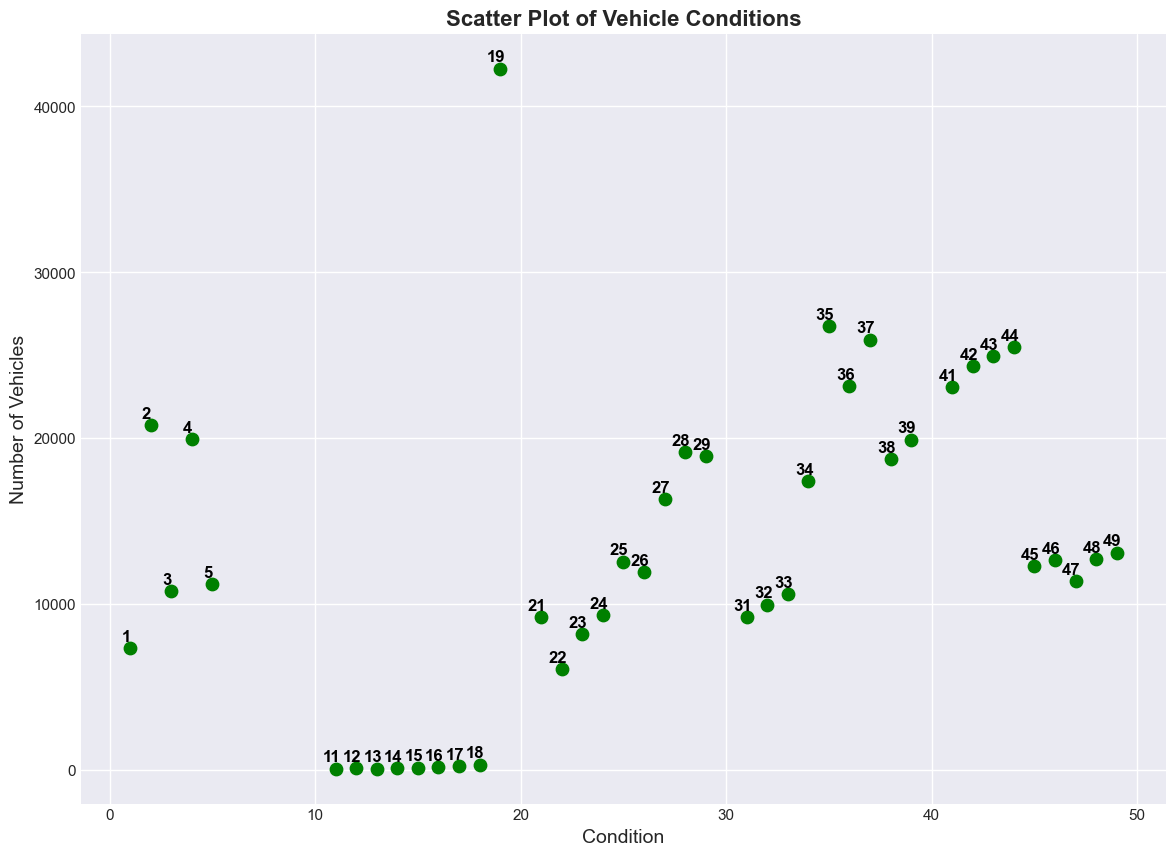

In [211]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset (Update the path if needed)
file_path = 'D:/vehical/car_prices.csv'
data = pd.read_csv(file_path)

# Ensure 'condition' column exists
if 'condition' in data.columns:
    # Count the occurrences of each vehicle condition
    vehicle_counts = data['condition'].value_counts().sort_index()

    # Create scatter plot
    plt.figure(figsize=(14, 10))
    plt.style.use('seaborn-darkgrid')
    plt.scatter(vehicle_counts.index, vehicle_counts.values, color='green', s=80)  # Increase point size

    # Place labels closer to points
    for i, txt in enumerate(vehicle_counts.index):
        plt.annotate(f"{int(txt)}",  # Convert to integer to remove decimal
                     (vehicle_counts.index[i], vehicle_counts.values[i]),
                     textcoords="offset points",
                     xytext=(-3, 5),  # Adjusted closer to points
                     ha='center', fontsize=12, fontweight='bold', color='black')

    # Improve readability
    plt.xlabel('Condition', fontsize=14)
    plt.ylabel('Number of Vehicles', fontsize=14)
    plt.title('Scatter Plot of Vehicle Conditions', fontsize=16, fontweight='bold')

    # Show plot
    plt.show()

else:
    print("Error: Column 'condition' not found in dataset!")


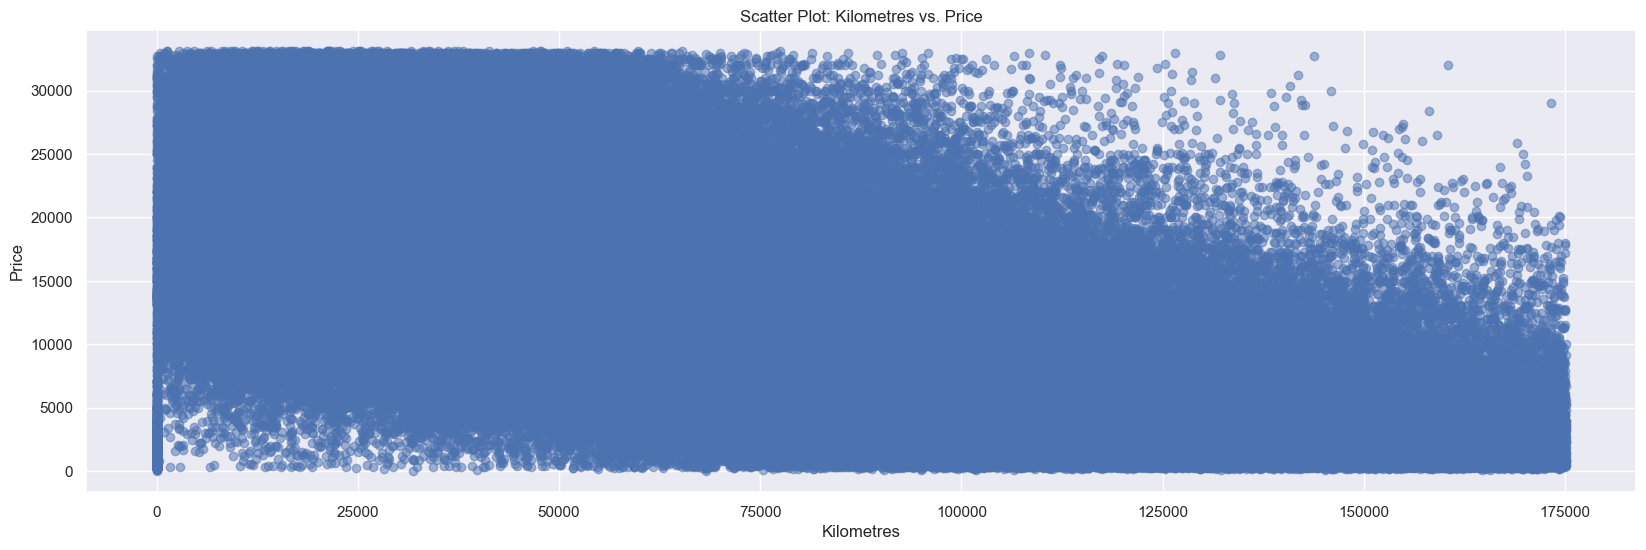

In [97]:
plt.figure(figsize=(20, 6))
plt.scatter(clean_df['odometer'], clean_df['sellingprice'], alpha=0.5)
plt.title('Scatter Plot: Kilometres vs. Price')
plt.xlabel('Kilometres')
plt.ylabel('Price')
plt.show()

In [219]:
data['odometer'].describe()

count    558743.000000
mean      68320.017767
std       53398.542821
min           1.000000
25%       28371.000000
50%       52254.000000
75%       99109.000000
max      999999.000000
Name: odometer, dtype: float64

In [351]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Step 1: Load the data
df = pd.read_csv("D:/vehical/car_prices.csv")

# Drop columns that might not be useful for prediction
df = df.drop(columns=["vin", "seller", "saledate"], errors='ignore')

# Remove rows with missing values (or alternatively, impute missing values)
df = df.dropna()

# Step 2: Encode Categorical Variables
# Identify columns with high cardinality and use Label Encoding
high_card_cols = ["make", "model", "trim", "body", "color", "interior"]
label_encoders = {}
for col in high_card_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le  # Save the encoder if you need to transform new data

# For columns with fewer unique values, you can use One-Hot Encoding. For example, "transmission" and "state":
## small unique values
df = pd.get_dummies(df, columns=["transmission", "state"], drop_first=True) (categorical variable)

# Step 3: Define Features and Target
X = df.drop(columns=["sellingprice"])  # feature
y = df["sellingprice"] # target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Initialize and Train the Model
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

# Step 5: Make Predictions and Evaluate the Model
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae) # how far predictions are from actual values
print("Mean Squared Error:", mse) # Penalizes larger errors more than MAE
print("R² Score:", r2) # Closer to 1.0 means better model


Mean Absolute Error: 925.2476793521411
Mean Squared Error: 2326731.7399966065
R² Score: 0.974400564153193


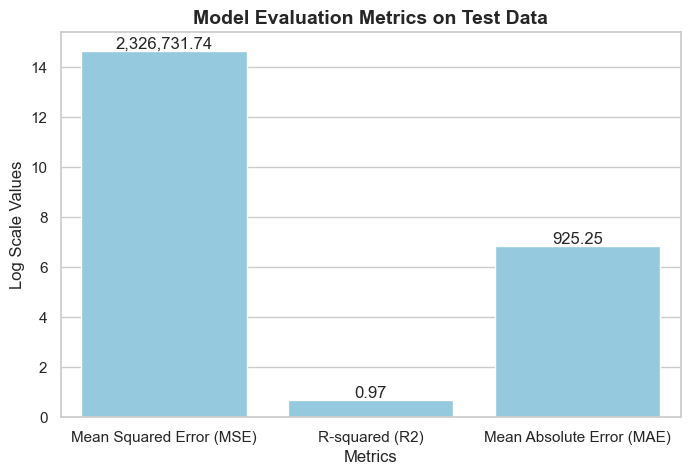

In [367]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Your evaluation metrics
metrics = ["Mean Squared Error (MSE)", "R-squared (R2)", "Mean Absolute Error (MAE)"]
values = [2326731.74, 0.9744, 925.25]  # Replace with your actual values

# Apply logarithmic scaling to improve visibility
log_values = [np.log1p(v) for v in values]  # log1p avoids log(0) issues

# Create bar plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=metrics, y=log_values, color="skyblue")

# Add labels on bars (convert back from log scale)
for i, v in enumerate(values):
    ax.text(i, log_values[i] + 0.1, f"{v:,.2f}", ha="center", fontsize=12)

# Titles and labels
plt.title("Model Evaluation Metrics on Test Data", fontsize=14, fontweight="bold")
plt.xlabel("Metrics", fontsize=12)
plt.ylabel("Log Scale Values", fontsize=12)

# Show the plot
plt.show()


In [385]:
import joblib

# Assuming 'model' is your trained Random Forest model
model_filename = 'random_forest_model.pkl'
joblib.dump(model, model_filename)

print(f"Model saved as {model_filename}")


Model saved as random_forest_model.pkl


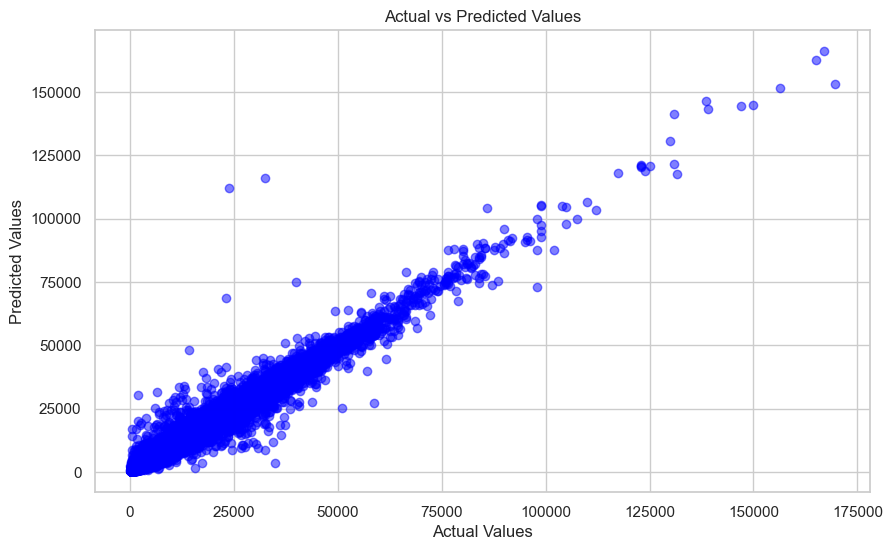

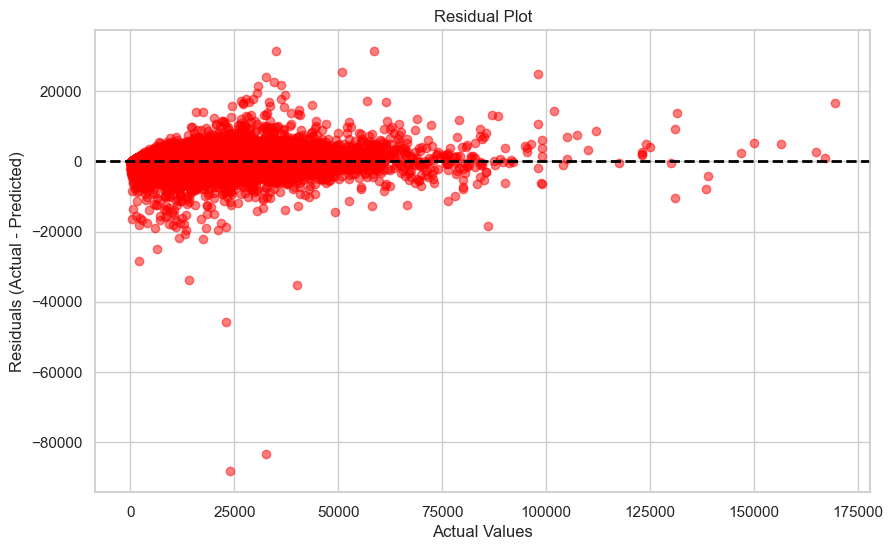

In [389]:
import matplotlib.pyplot as plt
import numpy as np

# Make predictions on the test set
y_pred_test = model.predict(X_test)

# Scatter plot for actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5, color="blue")
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

# Residual plot
residuals = y_test - y_pred_test
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, alpha=0.5, color="red")
plt.title('Residual Plot')
plt.xlabel('Actual Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.axhline(y=0, color='black', linestyle='--', linewidth=2)
plt.grid(True)
plt.show()
